**EDA on House Price Prediction** 

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import probplot

In [8]:
df = pd.read_excel("part1.xlsx")


In [9]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [10]:
df.shape

(414, 9)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [12]:
df.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


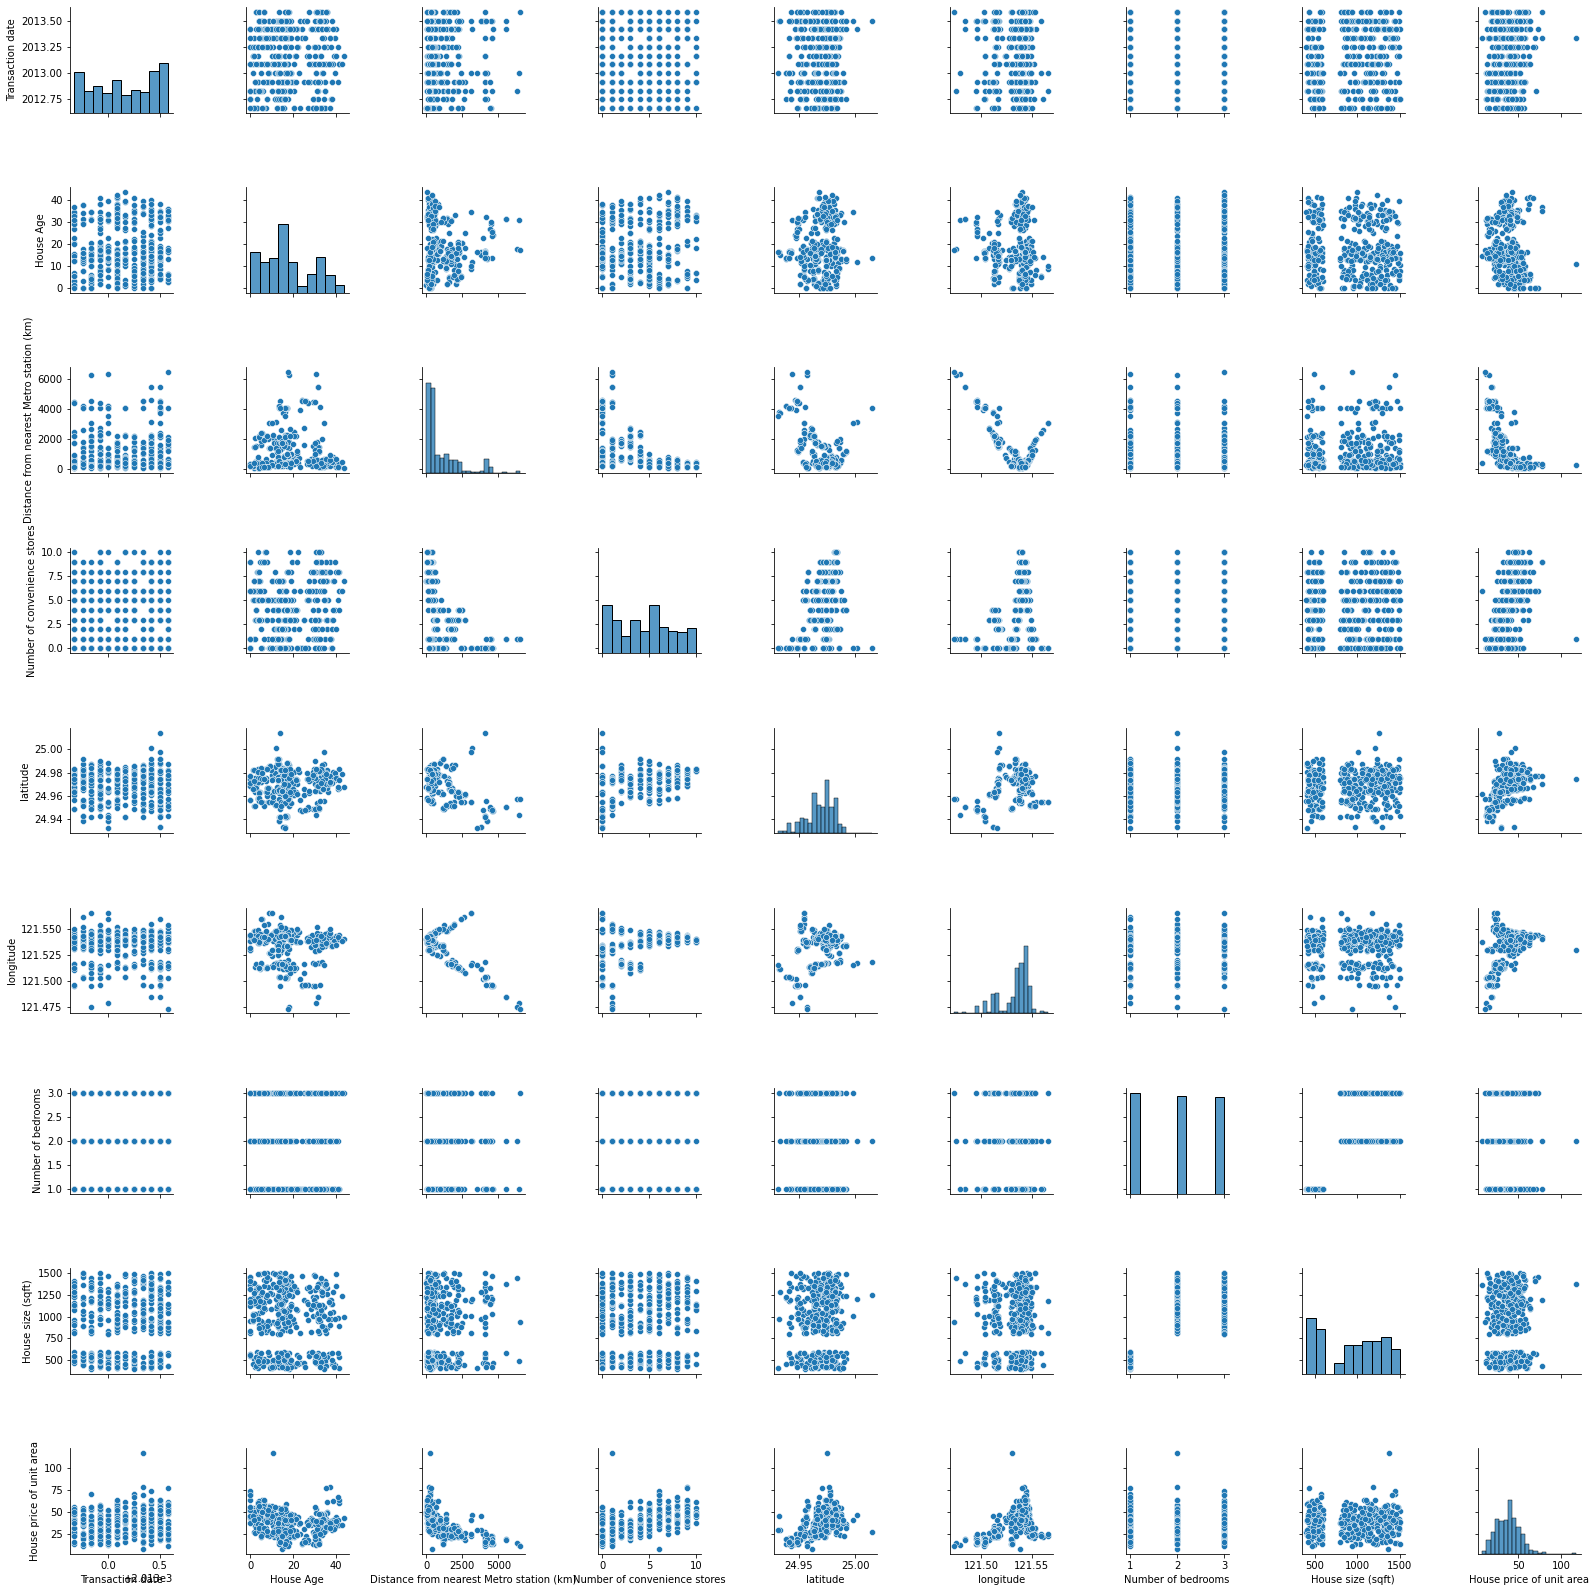

In [36]:
sns.pairplot(df)

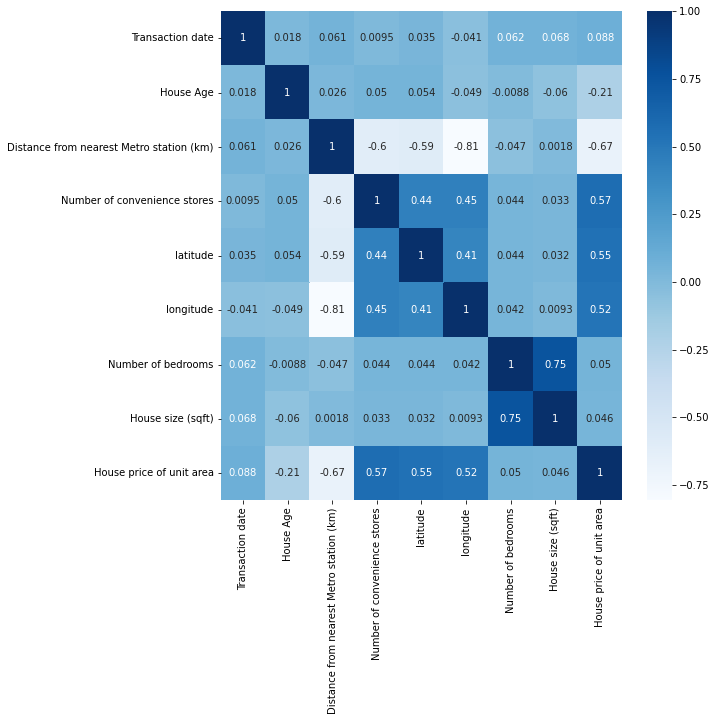

In [39]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


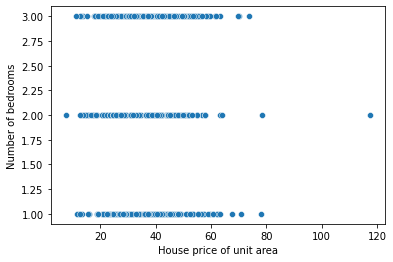

In [41]:
sns.scatterplot(df['House price of unit area'],df['Number of bedrooms'])

In [26]:
drop_columns=['longitude','latitude','Transaction date']

In [27]:
df1=df.drop(drop_columns,axis=1)

In [17]:
df1.shape

(414, 6)

In [19]:
df1.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,1,575,37.9
1,19.5,306.59470,9,2,1240,42.2
2,13.3,561.98450,5,3,1060,47.3
3,13.3,561.98450,5,2,875,54.8
4,5.0,390.56840,5,1,491,43.1


In [21]:
df1.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,1.987923,931.475845,37.980193
std,11.392485,1262.109595,2.945562,0.818875,348.910269,13.606488
min,0.000000,23.382840,0.000000,1.000000,402.000000,7.600000
25%,9.025000,289.324800,1.000000,1.000000,548.000000,27.700000
50%,16.100000,492.231300,4.000000,2.000000,975.000000,38.450000
75%,28.150000,1454.279000,6.000000,3.000000,1234.750000,46.600000
max,43.800000,6488.021000,10.000000,3.000000,1500.000000,117.500000


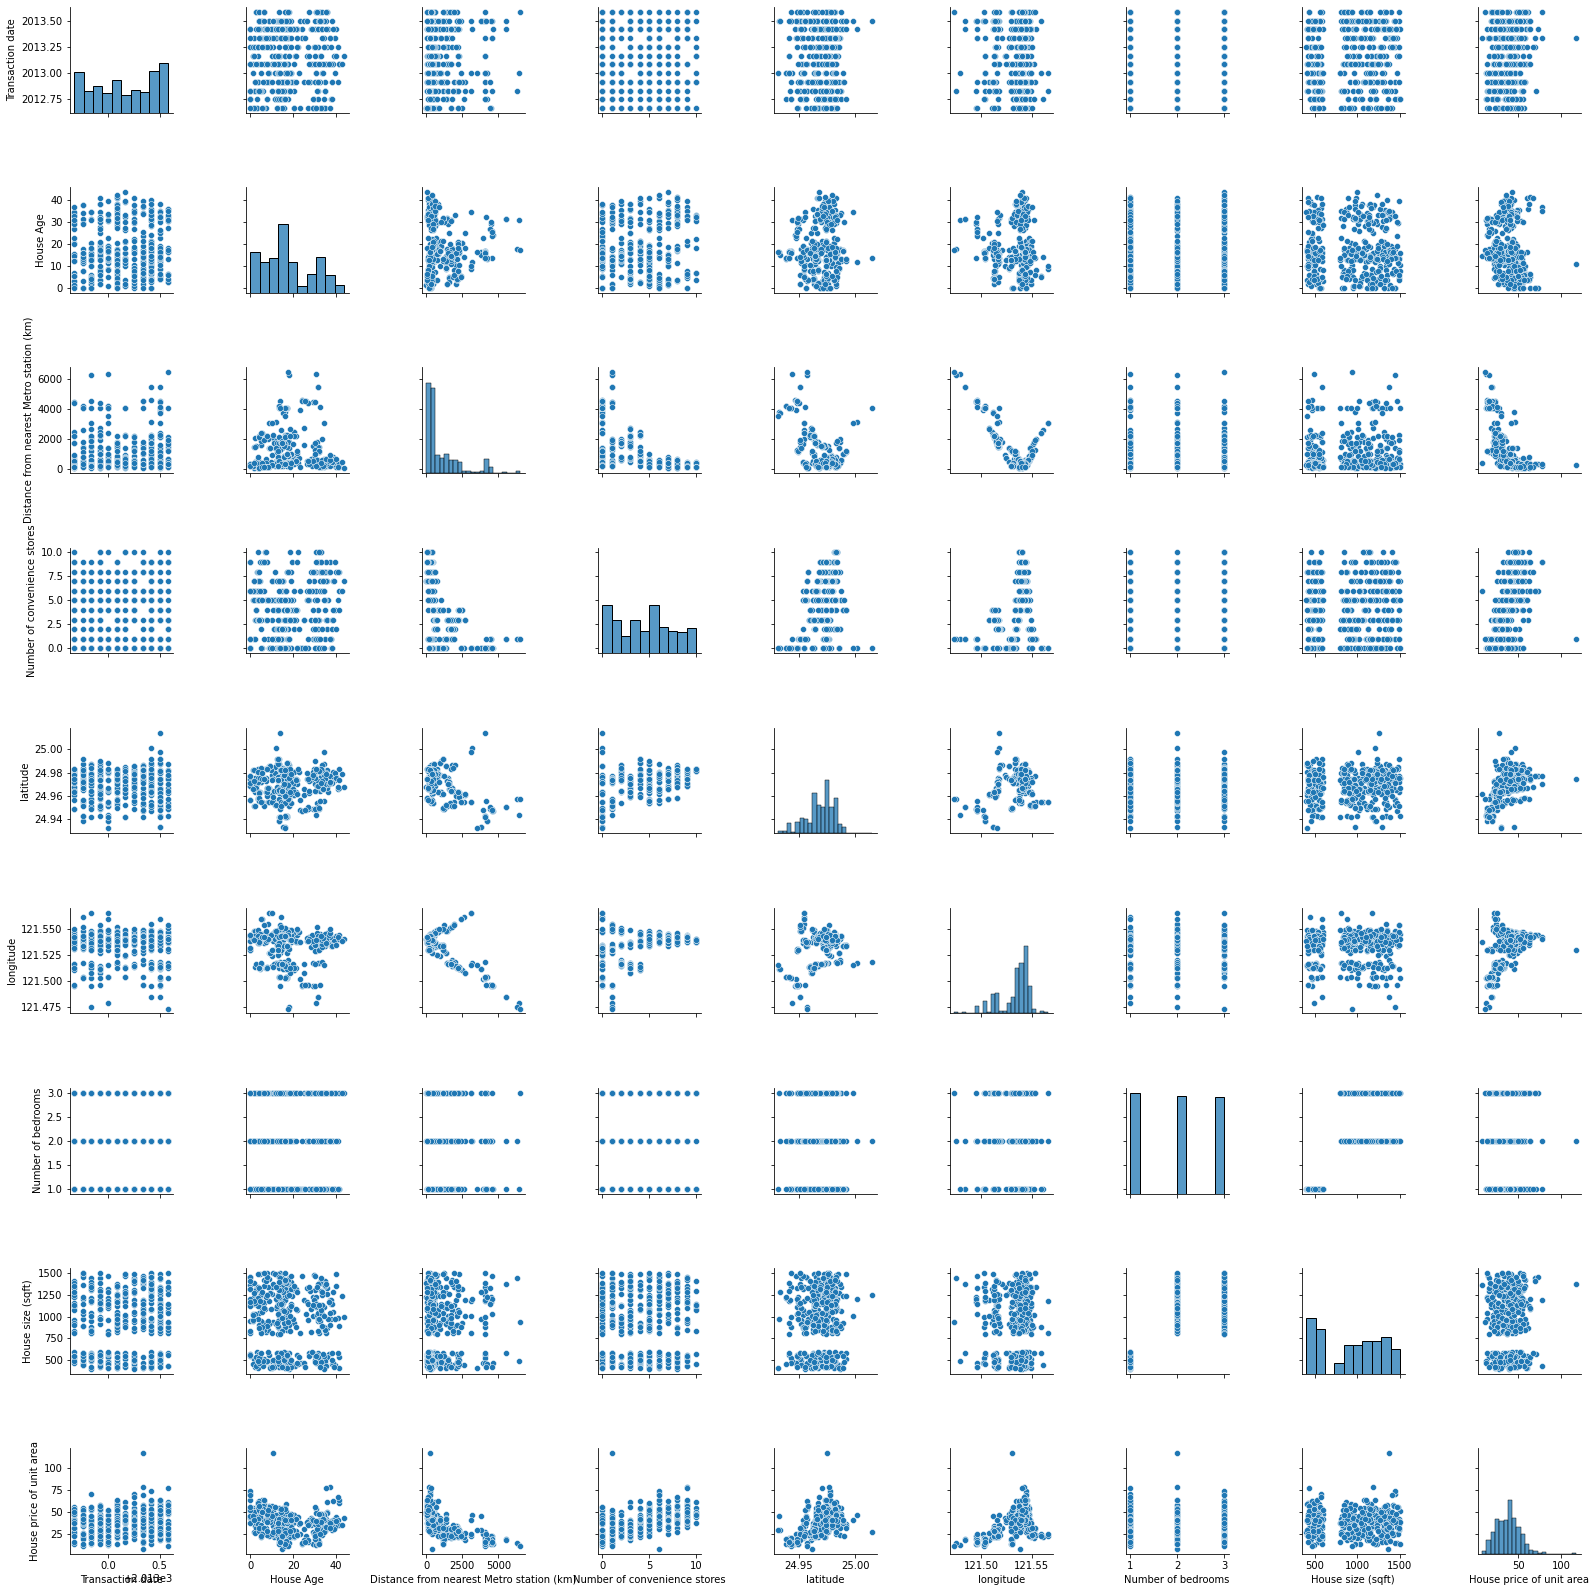

In [52]:
sns.pairplot(df)

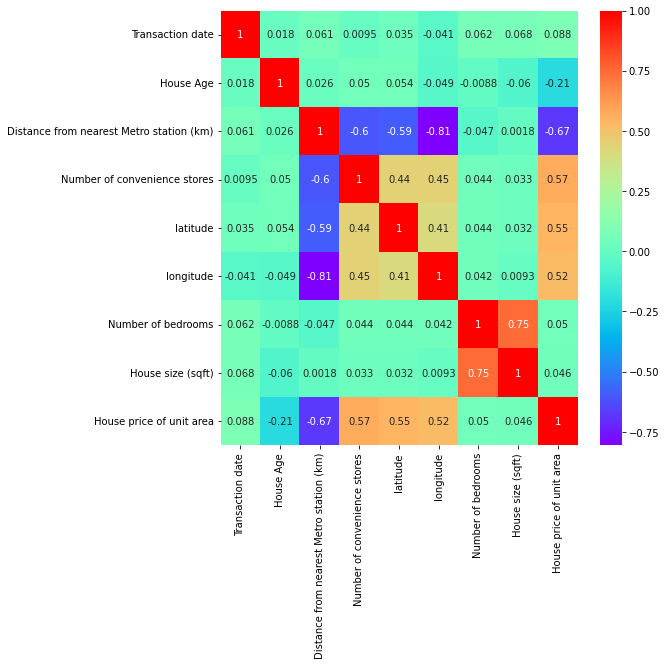

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

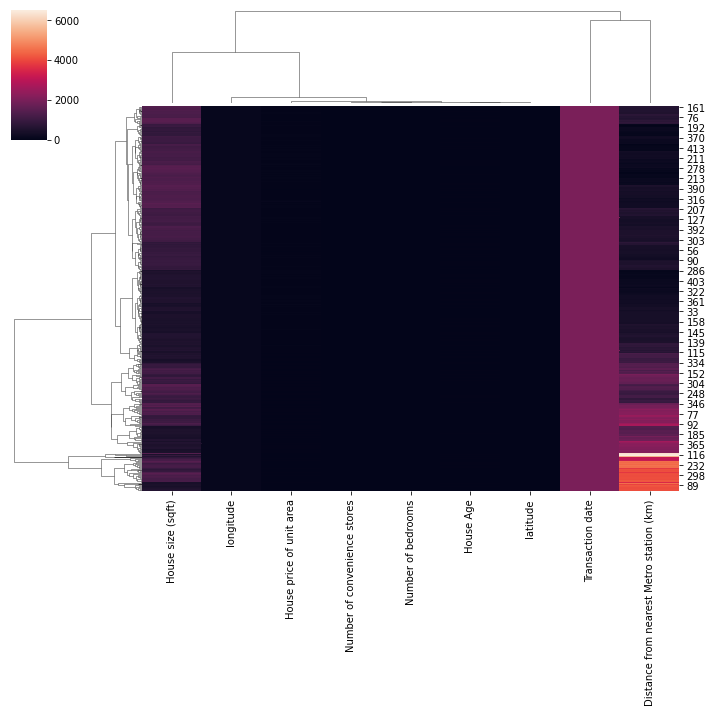

In [46]:
sns.clustermap(df)

In [42]:
X = df1.drop('House price of unit area',axis='columns')
X.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft)
0,32.0,84.87882,10,1,575
1,19.5,306.59470,9,2,1240
2,13.3,561.98450,5,3,1060
3,13.3,561.98450,5,2,875
4,5.0,390.56840,5,1,491


In [44]:
Y=df1['House price of unit area']
Y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House price of unit area, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [47]:
models = []
scores = []

In [54]:
def fit_and_test_model(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
    print("R2 Score:",r2_score(y_test,pred))
    models.append(str(model).split('(')[0])
    scores.append(r2_score(y_test,pred))

In [55]:
fit_and_test_model(LinearRegression())

RMSE: 8.787423442701856
R2 Score: 0.5491009077843255


In [56]:
fit_and_test_model(KNeighborsRegressor())

RMSE: 9.568413649034836
R2 Score: 0.4653911597633933


In [57]:
fit_and_test_model(GradientBoostingRegressor())

RMSE: 7.744272848050925
R2 Score: 0.6497988695868055


In [58]:
fit_and_test_model(BaggingRegressor())

RMSE: 8.746397606119753
R2 Score: 0.5533013040888015


In [59]:
fit_and_test_model(HistGradientBoostingRegressor())

RMSE: 7.481760318572751
R2 Score: 0.67313845086301


In [60]:
fit_and_test_model(ExtraTreesRegressor())

RMSE: 6.897761028393147
R2 Score: 0.7221742210795052


In [61]:
fit_and_test_model(DecisionTreeRegressor())

RMSE: 14.593454548620437
R2 Score: -0.2435764005642349


In [62]:
fit_and_test_model(RandomForestRegressor())

RMSE: 7.520660719820474
R2 Score: 0.669730669819285


In [63]:
fit_and_test_model(XGBRegressor())

[07:02:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 8.785238904512275
R2 Score: 0.5493250653790039


In [64]:
model_performances = pd.DataFrame([models,scores]).T
model_performances.columns = ['Model','R2 Score']
model_performances.set_index('Model',inplace=True)
model_performances = model_performances.sort_values('R2 Score',ascending=False)
model_performances

,R2 Score
Model,
ExtraTreesRegressor,0.722174
HistGradientBoostingRegressor,0.673138
RandomForestRegressor,0.669731
GradientBoostingRegressor,0.649799
BaggingRegressor,0.553301
XGBRegressor,0.549325
LinearRegression,0.549101
KNeighborsRegressor,0.465391
DecisionTreeRegressor,-0.243576


Extra Trees Regressor is the best performing model with the accuracy of 72.2%